# Glasma Results

### We read the files

In [55]:
# We create a list with the files to read

N = 100

file_list = ['/lustre/HQCD/carlos.lamas/qJetLFH_v3/output/g=2_approx/result_%i_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_80.000000_wy_80.000000_cQ_1_hQ_1_mq0_4.200_mq_4.200_mg_0.150_Lperp_15_Nperp_256_Leta_3.630000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_31/pperp/evolution_Pperp_sq.dat' %n for n in range(N)]

In [56]:
#We read eache file into a dataframe of a list

import pandas as pd 

df_list = []
for i in range(N):
    df = pd.read_table(file_list[i], header = None)
    df_list.append(df)

### We get the average $p_\perp$ as a function of $x^+$

In [57]:
# We compute the average p_perp and the deviation at every time step

import numpy as np 

s = np.zeros((N, len(np.array(df_list[0]))))


for i in range(N):
    arr = np.array(df_list[i])
    xplus = arr[:,0]
    
    
    for j in range(len(arr)):
        s[i, j] = arr[j, 1]
        
p_av = [np.average(s[:,j]) for j in range(len(np.array(df_list[0])))]
p_sigma = [np.std(s[:,j])/np.sqrt(N) for j in range(len(np.array(df_list[0])))]

p_av_p = [p_av[j]-p_av[0] for j in range(len(np.array(df_list[0])))]
        
print(xplus)
print(p_av)
print (p_av_p)
print (p_sigma)

[0.       0.234194 0.468387 0.702581 0.936774 1.17097  1.40516  1.63935
 1.87355  2.10774  2.34194  2.57613  2.81032  3.04452  3.27871  3.5129  ]
[280.69900000000007, 280.91894, 282.14698999999996, 283.40154, 284.52771, 285.39522000000005, 285.62821999999994, 285.98023, 286.59379000000007, 286.94687, 286.96644, 286.99837999999994, 287.19383, 287.4185, 287.58635000000004, 287.67296]
[0.0, 0.2199399999999514, 1.4479899999998906, 2.702539999999942, 3.828709999999944, 4.6962199999999825, 4.929219999999873, 5.281229999999937, 5.89479, 6.247869999999921, 6.267439999999908, 6.299379999999871, 6.494829999999922, 6.719499999999925, 6.887349999999969, 6.97395999999992]
[5.684341886080802e-15, 0.011069903522614827, 0.07948257984615234, 0.16521885268939468, 0.2483575649320955, 0.3185655265655717, 0.2888043969817634, 0.28784156331391764, 0.32528217605488285, 0.33646245842738537, 0.33514492516521877, 0.35033612710652634, 0.34591979274247964, 0.3775197760382889, 0.35570358513093436, 0.350284307361891

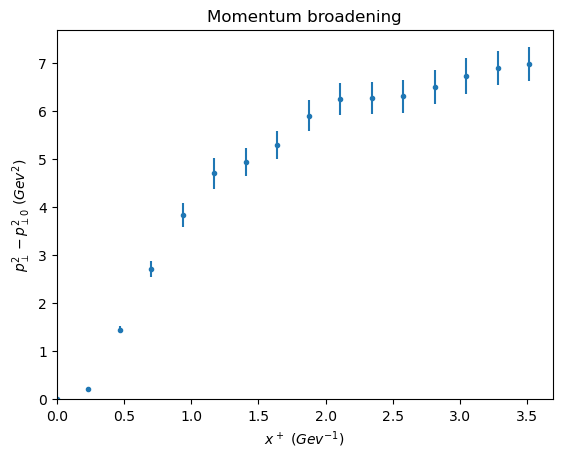

In [58]:
# We plot the results

import matplotlib.pyplot as plt 

plt.errorbar(xplus, p_av_p, p_sigma, fmt = '.')
plt.xlim(left=0); plt.ylim(bottom=0)
plt.xlabel(r'$x^+ \ (Gev^{-1})$'); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (Gev^2)$')
plt.title('Momentum broadening')
plt.savefig('Jets in Glasma Results/g=2_approx/Momentum_broadening_w80.png')

In [60]:
# We save to file

np.savetxt('Jets in Glasma Results/g=2_approx/p_perp2_w80.txt', [xplus, p_av_p, p_sigma], fmt='%f')

### We get the average $\hat{q}$ as a function of $x^+$

In [61]:
# We compute the qhat at every time step

qhat = np.diff(p_av)/np.diff(xplus)
qhat_sigma = [np.sqrt((p_sigma[i+1]/(xplus[i+1]-xplus[i]))**2 + (p_sigma[i]/(xplus[i+1]-xplus[i]))**2) for i in range(len(p_av)-1)]

print(qhat)

[0.93913593 5.24375195 5.35688361 4.80872614 3.70420502 0.99491866
 1.50309578 2.61981213 1.50766472 0.08356106 0.13638499 0.83457876
 0.95930828 0.71672574 0.36982792]


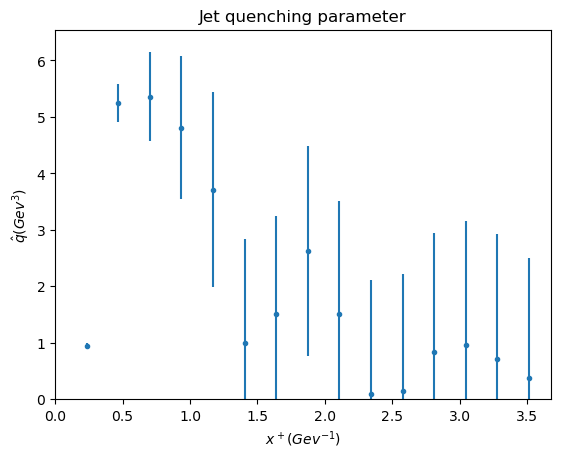

In [62]:
# We plot the results

plt.errorbar(xplus[1:len(xplus)], qhat, qhat_sigma, fmt = '.')
plt.xlim(left=0); plt.ylim(bottom=0)
plt.xlabel(r'$x^+ (Gev^{-1})$'); plt.ylabel(r'$\hat{q} (Gev^3)$')
plt.title('Jet quenching parameter')
plt.savefig('Jets in Glasma Results/g=2_approx/qhat_w80.png')

In [63]:
# We save to file

np.savetxt('Jets in Glasma Results/g=2_approx/qhat_w80.txt', [xplus[1:len(xplus)], qhat, qhat_sigma], fmt='%f')

### We compare the different widths

In [44]:
import numpy as np

p01 = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/mid_rapidity/p_perp2_w01.txt'); q01 = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/mid_rapidity/qhat_w01.txt')
p05 = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/mid_rapidity/p_perp2_w5.txt'); q5 = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/mid_rapidity/qhat_w5.txt')
p1 = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/mid_rapidity/p_perp2_w10.txt'); q10 = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/mid_rapidity/qhat_w10.txt')
p2 = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/mid_rapidity/p_perp2_w20.txt'); q20 = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/mid_rapidity/qhat_w20.txt')
p5 = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/mid_rapidity/p_perp2_w30.txt'); q30 = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/mid_rapidity/qhat_w30.txt')


xplus = p01[0]; xplus_q = q01[0]
p01_dat = p01[1]; p5_dat = p5[1]; p10_dat = p10[1]; p20_dat = p20[1]; p30_dat = p30[1]
q01_dat = q01[1]; q5_dat = q5[1]; q10_dat = q10[1]; q20_dat = q20[1]; q30_dat = q30[1]

p01_sig = p01[2]; p5_sig = p5[2]; p10_sig = p10[2]; p20_sig = p20[2]; p30_sig = p30[2]
q01_sig = q01[2]; q5_sig = q5[2]; q10_sig = q10[2]; q20_sig = q20[2]; q30_sig = q30[2]

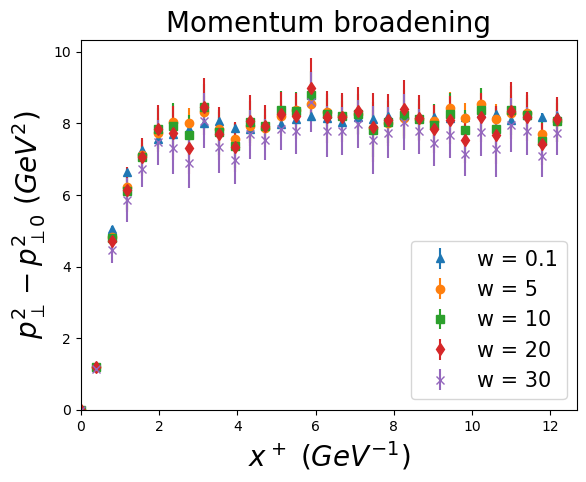

In [45]:
# We plot the momentum broadening

import matplotlib.pyplot as plt

plt.errorbar(xplus, p01_dat, p01_sig, fmt='^', label='w = 0.1')
plt.errorbar(xplus, p5_dat, p5_sig, fmt='o', label='w = 5')
plt.errorbar(xplus, p10_dat, p10_sig, fmt='s', label='w = 10')
plt.errorbar(xplus, p20_dat, p20_sig, fmt='d', label='w = 20')
plt.errorbar(xplus, p30_dat, p30_sig, fmt='x', label='w = 30')


plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$', fontsize=20)
plt.title('Momentum broadening', fontsize=20)

plt.xlim(0, max(xplus)+0.5); plt.ylim(bottom=0)
plt.legend(fontsize=15)

plt.savefig('Jets in Glasma Results/mid_rapidity/Combined_momentum_broadening.png', bbox_inches='tight')

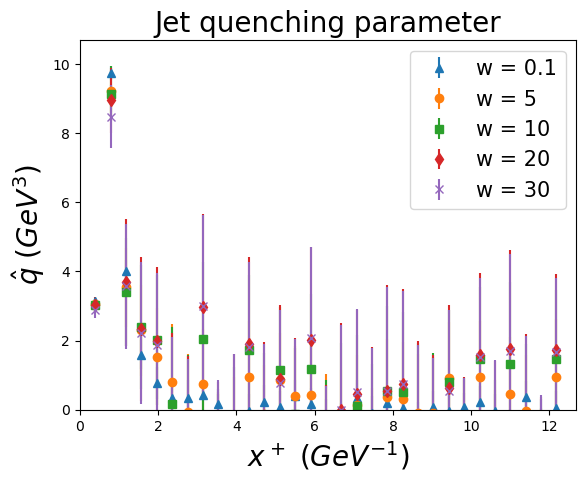

In [46]:
# We plot the jet quenching parameter

plt.errorbar(xplus_q, q01_dat, q01_sig, fmt='^', label='w = 0.1')
plt.errorbar(xplus_q, q5_dat, q5_sig, fmt='o', label='w = 5')
plt.errorbar(xplus_q, q10_dat, q10_sig, fmt='s', label='w = 10')
plt.errorbar(xplus_q, q20_dat, q20_sig, fmt='d', label='w = 20')
plt.errorbar(xplus_q, q30_dat, q30_sig, fmt='x', label='w = 30')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q} \ (GeV^3)$', fontsize=20)
plt.title('Jet quenching parameter', fontsize=20)

plt.xlim(0, max(xplus_q)+0.5); plt.ylim(bottom=0)
plt.legend(fontsize=15)

plt.savefig('Jets in Glasma Results/mid_rapidity/Combined_qhat.png', bbox_inches='tight')

### We compare with the classical results

In [64]:
import numpy as np

p_lc = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/g=2_approx/p_perp2_w80.txt'); q_lc = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/g=2_approx/qhat_w80.txt')
p_class = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/g=2_approx/classical_momentum_broadening.txt'); q_class = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/g=2_approx/classical_qhat.txt')

xplus = p_lc[0]; xplus_q = q_lc[0]
p_lc_dat = p_lc[1]; p_lc_sig = p_lc[2]; q_lc_dat = q_lc[1]; q_lc_sig = q_lc[2]

xplus_class = p_class[0]; xplus_class_q = q_class[0]
p_class_dat = p_class[1]; q_class_dat = q_class[1]

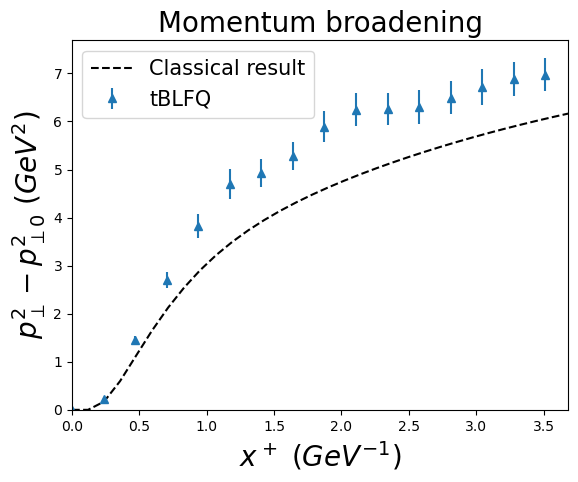

In [65]:
# We plot the momentum broadening

import matplotlib.pyplot as plt

plt.errorbar(xplus, p_lc_dat, p_lc_sig, fmt='^', label='tBLFQ')
plt.plot(xplus_class, p_class_dat, 'k--', label='Classical result')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$', fontsize=20)
plt.title('Momentum broadening', fontsize=20)

plt.xlim(0, max(xplus_class)); plt.ylim(bottom=0)
plt.legend(fontsize=15)

plt.savefig('Jets in Glasma Results/g=2_approx/Momentum_broadening.png', bbox_inches='tight')

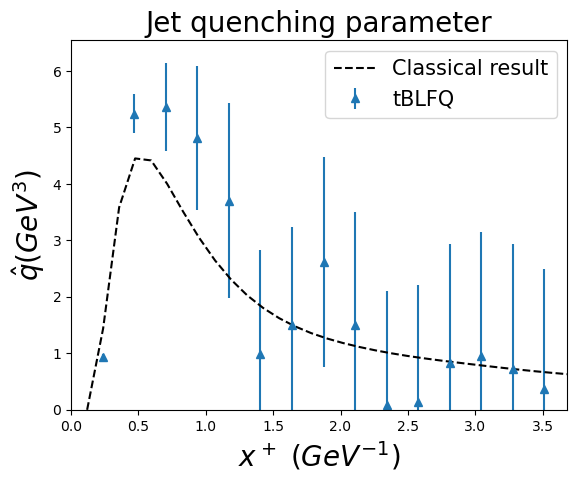

In [66]:
# We plot the qhat

plt.errorbar(xplus_q, q_lc_dat, q_lc_sig, fmt='^', label='tBLFQ')
plt.plot(xplus_class_q, q_class_dat, 'k--', label='Classical result')


plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q} (GeV^3)$', fontsize=20)
plt.title('Jet quenching parameter', fontsize=20)

plt.xlim(0, max(xplus_class_q)); plt.ylim(bottom=0)
plt.legend(fontsize=15)

plt.savefig('Jets in Glasma Results/g=2_approx/qhat.png', bbox_inches='tight')

### We get the anisotropic broadening for every event and then average

In [67]:
# We create a list with the files to read

Nevents = 100
tlist = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]

file_list = [['/lustre/HQCD/carlos.lamas/qJetLFH_v3/output/g=2_approx/result_%i_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_80.000000_wy_80.000000_cQ_1_hQ_1_mq0_4.200_mq_4.200_mg_0.150_Lperp_15_Nperp_256_Leta_3.630000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_31/pperp/Pperp_q_t_%i.dat' % (n, t) for t in tlist] for n in range(Nevents)]

In [68]:
# We convert to an array of DataFrames

import pandas as pd 
import numpy as np

df_list = []

for i in range(Nevents):
    df = [pd.read_table(file_list[i][t], header = None) for t in range(len(tlist))]
    df_list.append(df)

data = np.array(df_list)

In [69]:
# We create a vector with the probability of every value of p_y and other for every value of p_z at every time for every event

hbarc = 0.197326 
N = 512
L = 6/hbarc
a = L/N

Py = np.array([[[sum(data[n, t, :, y]) for y in range(N)] for t in range(len(tlist))] for n in range(Nevents)])
Pz = np.array([[[sum(data[n, t, z, 0:N]) for z in range(N)] for t in range(len(tlist))] for n in range(Nevents)])

In [70]:
# We compute the value of p^2 associated with every point

p2 = np.array([(n*2*np.pi/L)**2 for n in range (N//2)] + [((n-N)*2*np.pi/L)**2 for n in range(N//2, N)])

In [71]:
# We now multiply the probability by the corresponding value of the momentum squared

py2 = np.array([[[Py[n, t, y]*p2[y] for y in range(N)] for t in range(len(tlist))] for n in range(Nevents)])
pz2 = np.array([[[Pz[n, t, z]*p2[z] for z in range(N)] for t in range(len(tlist))] for n in range(Nevents)])

In [72]:
# We sum all the momentum modes

py2_tot = np.array([[sum(py2[n, t, :]) for t in range(len(tlist))] for n in range(Nevents)])
pz2_tot = np.array([[sum(pz2[n, t, :]) for t in range(len(tlist))] for n in range(Nevents)])

In [73]:
py2_av = [np.average(py2_tot[:,t]) for t in range(len(tlist))]
py2_sig = [np.std(py2_tot[:,t])/np.sqrt(Nevents) for t in range(len(tlist))]

pz2_av = [np.average(pz2_tot[:,t]) for t in range(len(tlist))]
pz2_sig = [np.std(pz2_tot[:,t])/np.sqrt(Nevents) for t in range(len(tlist))]

In [74]:
print(py2_av)
print(py2_sig)

print("################################")

print(pz2_av)
print(pz2_sig)

[136.6217381560019, 136.83563219827136, 138.002538894167, 139.1261826813609, 140.09116071515137, 140.81097961671173, 140.89352875242454, 141.09084886192474, 141.54769254409183, 141.81120821707225, 141.79091964936066, 141.74812285166917, 141.82511049279665, 141.9633148196516, 142.02574204166703, 141.97555638097208]
[2.842170943040401e-15, 0.010772426703745468, 0.07688392637345635, 0.15761854747447662, 0.235206931860999, 0.3011106765043377, 0.27741278203064834, 0.275621197128966, 0.30913526008459724, 0.3100484199792818, 0.31276335953199774, 0.3267156414739194, 0.3183193842005545, 0.3368875313389539, 0.3112152579499169, 0.29490096601870486]
################################
[136.6217381560019, 136.6217381795466, 136.65025020691678, 136.74784640506417, 136.87916657125112, 137.00382649964482, 137.14806261024842, 137.29335328449363, 137.43375773048368, 137.5140211992122, 137.55330147538686, 137.62721819701258, 137.74055402258594, 137.821007814499, 137.92194340263748, 138.0564704561433]
[2.842

In [75]:
# We subtract the initial momentum to every other

py2_dif = [py2_av[t]-py2_av[0] for t in range(len(tlist))]
pz2_dif = [pz2_av[t]-pz2_av[0] for t in range (len(tlist))]

# We compute xplus

xplus = [2*a*t for t in (tlist)]

# And compute the qhat

qy = np.diff(py2_av)/np.diff(xplus)
qz = np.diff(pz2_av)/np.diff(xplus)

# And the uncertainty of qhat

qy_sig = [np.sqrt((py2_sig[i]/(xplus[i]-xplus[i-1]))**2 + (py2_sig[i-1]/(xplus[i]-xplus[i-1]))**2) for i in range(1, len(py2_sig))]
qz_sig = [np.sqrt((pz2_sig[i]/(xplus[i]-xplus[i-1]))**2 + (pz2_sig[i-1]/(xplus[i]-xplus[i-1]))**2) for i in range(1, len(pz2_sig))]


In [76]:
# We save to file

np.savetxt('Jets in Glasma Results/g=2_approx/p_perp2_anisotropic.txt', [xplus, py2_dif, pz2_dif, py2_sig, pz2_sig], fmt='%f')
np.savetxt('Jets in Glasma Results/g=2_approx/qhat_anisotropic.txt', [xplus[1:len(xplus)], qy, qz, qy_sig, qz_sig], fmt='%f')

### We plot the anisotropic results

In [80]:
import numpy as np

p_lc = np.loadtxt('Jets in Glasma Results/g=2_approx/p_perp2_anisotropic.txt'); q_lc = np.loadtxt('Jets in Glasma Results/g=2_approx/qhat_anisotropic.txt')
p_class = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/g=2_approx/classical_anisotropic_momentum_broadening.txt'); q_class = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/g=2_approx/classical_anisotropic_qhat.txt')

xplus = p_lc[0]; xplus_q = xplus[1:len(xplus)]

py2_lc = p_lc[1]/3; pz2_lc = p_lc[2]/3; py2_lc_sig = p_lc[3]/3; pz2_lc_sig = p_lc[4]/3
qy_lc = q_lc[1]/3; qz_lc = q_lc[2]/3; qy_lc_sig = q_lc[3]/3; qz_lc_sig = q_lc[4]/3

xplus_class = p_class[0]; xplus_class_q = q_class[0]
py2_class = p_class[1]; pz2_class = p_class[2]
qy_class = q_class[1]; qz_class = q_class[2]


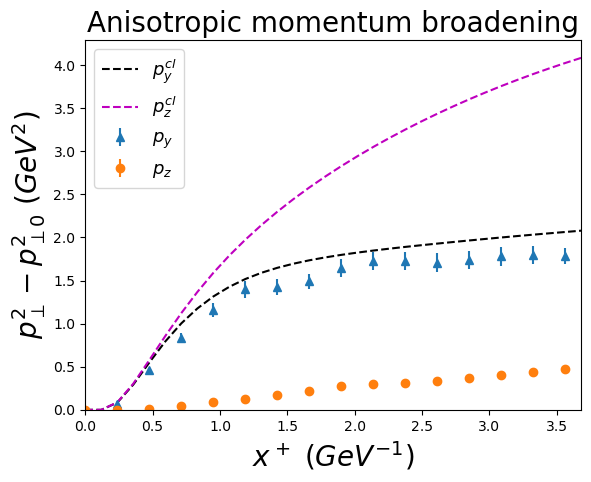

In [81]:
# We plot the momentum broadening

import matplotlib.pyplot as plt

plt.errorbar(xplus, py2_lc, py2_lc_sig, fmt='^', label=r'$p_y$')
plt.errorbar(xplus, pz2_lc, pz2_lc_sig, fmt='o', label=r'$p_z$')

plt.plot(xplus_class, py2_class, 'k--', label=r'$p_y^{cl}$')
plt.plot(xplus_class, pz2_class, 'm--', label=r'$p_z^{cl}$')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$', fontsize=20)
plt.title('Anisotropic momentum broadening', fontsize=20)

plt.xlim(0, max(xplus_class)); plt.ylim(bottom=0)
plt.legend(fontsize=13)

plt.savefig('Jets in Glasma Results/g=2_approx/anisotropic_momentum_broadening_Nc.png', bbox_inches='tight')

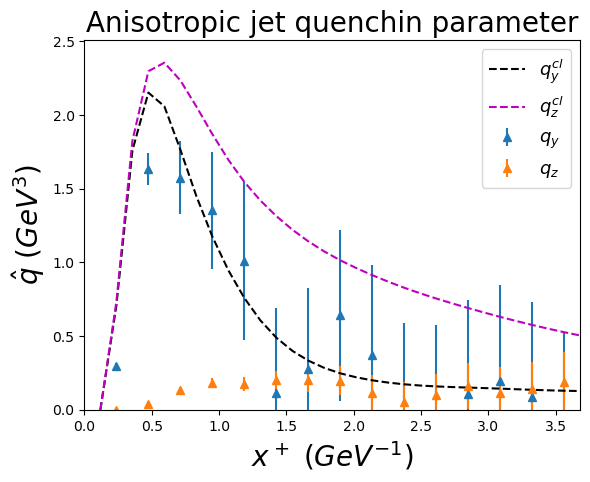

In [82]:
# We plot the qhat

import matplotlib.pyplot as plt

plt.errorbar(xplus_q, qy_lc, qy_lc_sig, fmt='^', label=r'$q_y$')
plt.errorbar(xplus_q, qz_lc, qz_lc_sig, fmt='^', label=r'$q_z$')

plt.plot(xplus_class_q, qy_class, 'k--', label=r'$q_y^{cl}$')
plt.plot(xplus_class_q, qz_class, 'm--', label=r'$q_z^{cl}$')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q} \ (GeV^3)$', fontsize=20)
plt.title('Anisotropic jet quenchin parameter', fontsize=20)

plt.xlim(0, max(xplus_class_q)); plt.ylim(bottom=0)
plt.legend(fontsize=13)

plt.savefig('Jets in Glasma Results/g=2_approx/anisotropic_qhat_Nc.png', bbox_inches='tight')

In [42]:
# We check in the sum gives the same

p_tot = [py2_lc[t] + pz2_lc[t] for t in range(len(tlist))]
dat = np.loadtxt('Jets in Glasma Results/test_temp/p_perp2_w80.txt')
p_comp = dat[1]; x2 = dat[0]


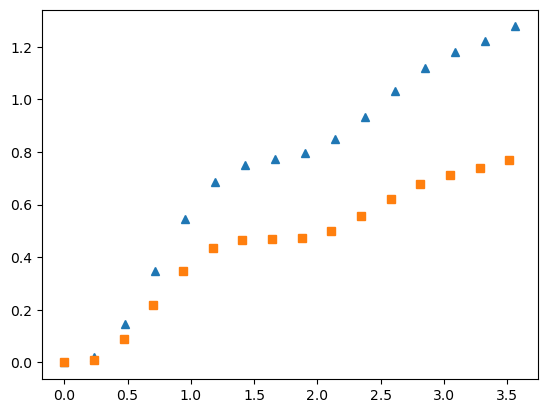

In [43]:
plt.plot(xplus, p_tot, '^')
plt.plot(x2, p_comp, 's')

### We plot the ratio $q_y/q_z$ for the LC gauge and temporal gauge background fields

In [13]:
import numpy as np

q_lc = np.loadtxt('Jets in Glasma Results/anisotropic_python/qhat_LC.txt')
q_temp = np.loadtxt('Jets in Glasma Results/anisotropic_python/qhat_temp.txt')
q_class = np.loadtxt('classical_results/anisotropic_qhat.txt')

xplus_q = q_lc[0]

qy_lc = q_lc[1]; qz_lc = q_lc[2]; qy_lc_sig = q_lc[3]; qz_lc_sig = q_lc[4]
qy_temp = q_temp[1]; qz_temp = q_temp[2]; qy_temp_sig = q_temp[3]; qz_temp_sig = q_temp[4]

xplus_class_q = q_class[0]
qy_class = q_class[1]; qz_class = q_class[2]

In [17]:
# We compute the ratios and the uncertainties

r_lc = [qy_lc[i]/qz_lc[i] for i in range(len(qy_lc))]
r_temp = [qy_temp[i]/qz_temp[i] for i in range(len(qy_temp))] 

r_lc_sig = [np.sqrt((qy_lc_sig[i]/qz_lc[i])**2 + (qy_lc[i]*qz_lc_sig[i]/qz_lc[i]**2)**2) for i in range(len(qy_lc))]
r_temp_sig = [np.sqrt((qy_temp_sig[i]/qz_temp[i])**2 + (qy_temp[i]*qz_temp_sig[i]/qz_temp[i]**2)**2) for i in range(len(qy_temp))]


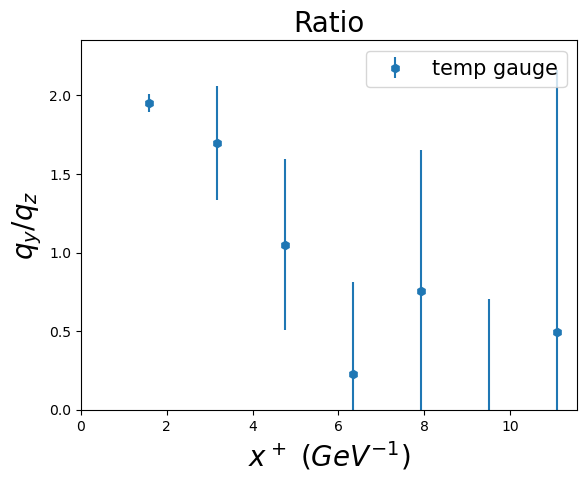

In [22]:
# We plot the momentum broadening

import matplotlib.pyplot as plt

# plt.errorbar(xplus_q, r_lc, r_lc_sig, fmt='^', label='LC gauge')
plt.errorbar(xplus_q, r_temp, r_temp_sig, fmt='h', label='temp gauge')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$q_y/q_z$', fontsize=20)
plt.title('Ratio', fontsize=20)

plt.xlim(left=0); plt.ylim(bottom=0)
plt.legend(fontsize=15)

plt.savefig('Jets in Glasma Results/temp_gauge/qhat_ratio.png', bbox_inches='tight')

### We plot the color map of momentum distribution

In [1]:
file_list = ['/lustre/HQCD/carlos.lamas/qJetLFH_v3/output/full_lc/result_0_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_20.000000_wy_20.000000_cQ_1_hQ_1_mq0_4.200_mq_4.200_mg_0.150_Lperp_6_Nperp_64_Leta_12.374000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_63/rperp/Rperp_q_t_56.dat']

In [3]:
#We read eache file into a dataframe of a list

import pandas as pd 

df_list = []
for i in range(1):
    df = pd.read_table(file_list[i], header = None)
    df_list.append(df)

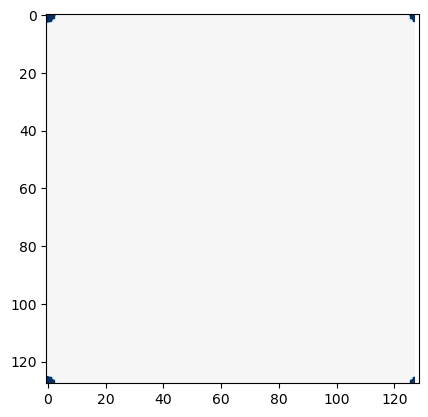

In [9]:
# We plot the momentum distribution
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.array(df_list[0]), cmap='RdBu', vmin=-0.001, vmax =0.001)